# <span style="font-size:24px">0. Preparation</span>

In [1]:
# loading modules
import pandas as pd
from plotnine import ggplot, aes, geom_col, labs, scale_x_continuous, theme
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [2]:
df_apr14=pd.read_csv("uber-raw-data-apr14.csv")
df_may14=pd.read_csv("uber-raw-data-may14.csv")
df_jun14=pd.read_csv("uber-raw-data-jun14.csv")
df_jul14=pd.read_csv("uber-raw-data-jul14.csv")
df_aug14=pd.read_csv("uber-raw-data-aug14.csv")
df_sep14=pd.read_csv("uber-raw-data-sep14.csv")

In [3]:
df = pd.concat([df_apr14, df_may14, df_jun14, df_jul14, df_aug14, df_sep14], ignore_index = True)

In [4]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
print(df.shape)

(4534327, 4)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [7]:
df = df.rename(columns = {"Date/Time" : "Date_Time"})

df["Date_Time"] = pd.to_datetime(df["Date_Time"])

df["Month"] = df["Date_Time"].dt.month_name()
df["Weekday"] = df["Date_Time"].dt.day_name()
df["Day"] = df["Date_Time"].dt.day
df["Hour"] = df["Date_Time"].dt.hour
df["Minute"] = df["Date_Time"].dt.minute

In [8]:
df.head()

,Date_Time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,April,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,April,Tuesday,1,0,33


# <span style="font-size:24px">1. Exploration and Visualization of Date_Time</span> 

## <span style="font-size:20px">1.1. Analyzing by Hour</span> 

In [9]:
df_hour_grouped = df.groupby(['Hour']).count()
df_hour_grouped.head()

,Date_Time,Lat,Lon,Base,Month,Weekday,Day,Minute
Hour,,,,,,,,
0,103836,103836,103836,103836,103836,103836,103836,103836
1,67227,67227,67227,67227,67227,67227,67227,67227
2,45865,45865,45865,45865,45865,45865,45865,45865
3,48287,48287,48287,48287,48287,48287,48287,48287
4,55230,55230,55230,55230,55230,55230,55230,55230


In [10]:
df_hour = pd.DataFrame({'Number_of_trips':df_hour_grouped.values[:,0]}, index = df_hour_grouped.index) 
df_hour.head()

,Number_of_trips
Hour,
0,103836
1,67227
2,45865
3,48287
4,55230


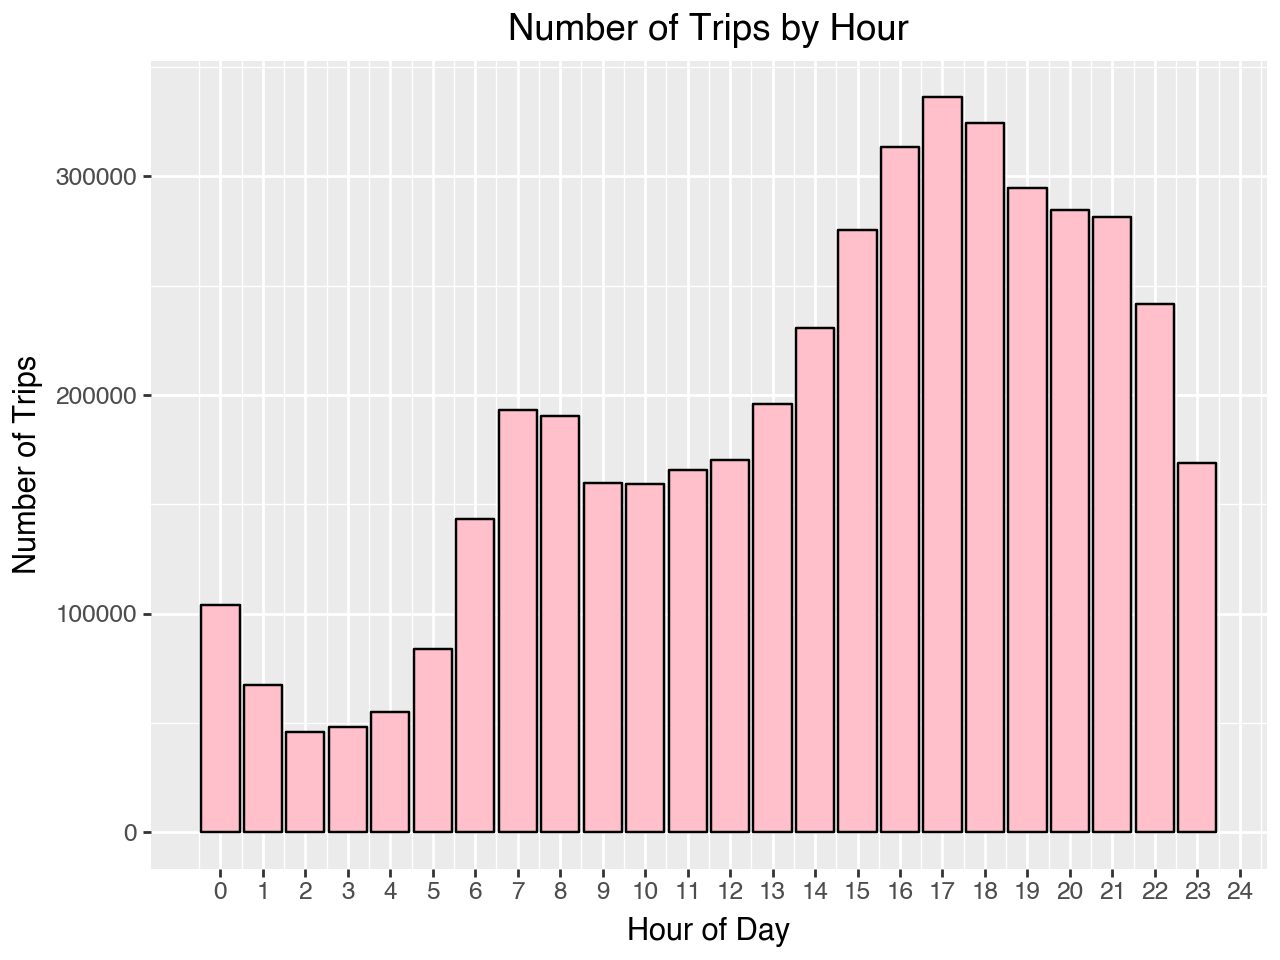

In [11]:
df_hour_reset = df_hour.reset_index()  
trip_by_hour = (
    ggplot(df_hour_reset, aes(x='Hour', y='Number_of_trips')) 
    + geom_col(fill='pink', color='black', alpha=1) 
    + labs(title='Number of Trips by Hour', x='Hour of Day', y='Number of Trips')
    + scale_x_continuous(breaks=range(0, 25))  
)
trip_by_hour.show()

In [12]:
max_trips = max(df_hour['Number_of_trips'])
max_hour = df_hour['Number_of_trips'].idxmax()
print('The highest number of trips by hour are {}, that corresponds to {}:00.'.format(max_trips, max_hour))

The highest number of trips by hour are 336190, that corresponds to 17:00.


<span style="font-size:16px"> __Conclusion__: We observe that the number of trips is higher around __16:00 and 18:00__, __peaking at 17:00__. This aligns with the end of the typical workday in the United States.</span>

## <span style="font-size:20px">1.2. Analyzing by Month</span> 

In [13]:
df_month_grouped = df.groupby(['Month'], sort = False).count()
df_month = pd.DataFrame({'Number_of_trips':df_month_grouped.values[:,0]}, index = df_month_grouped.index) 
df_month

,Number_of_trips
Month,
April,564516
May,652435
June,663844
July,796121
August,829275
September,1028136


In [14]:
df_month_reset = df_month.reset_index()
month_order = ['April', 'May', 'June', 
               'July', 'August', 'September']

df_month_reset['Month'] = pd.Categorical(
    df_month_reset['Month'], 
    categories=month_order, 
    ordered=True
)

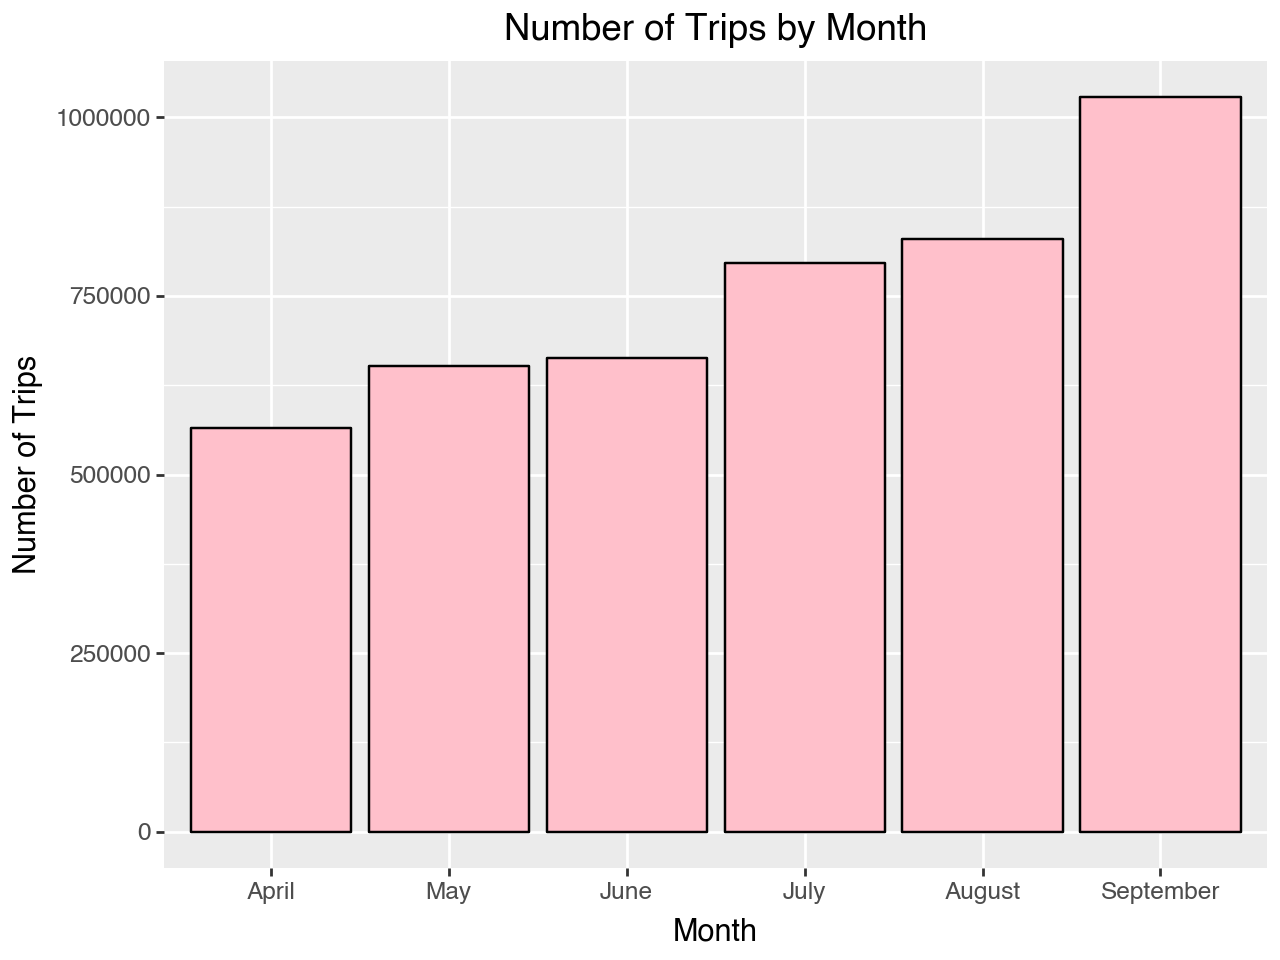

In [15]:
trip_by_month = (
    ggplot(df_month_reset, aes(x='Month', y='Number_of_trips')) 
    + geom_col(fill='pink', color='black', alpha=1) 
    + labs(title='Number of Trips by Month', x='Month', y='Number of Trips') 
)
trip_by_month.show()

In [16]:
max_trips_month = max(df_month['Number_of_trips'])
max_month = df_month['Number_of_trips'].idxmax()
print('The highest number of trips by month are {}, that corresponds to {}'.format(max_trips_month, max_month))

The highest number of trips by month are 1028136, that corresponds to September


In [17]:
number_of_trips_aug = df_month.loc['August'].values
number_of_trips_sep = df_month.loc['September'].values

ratio_month = (((number_of_trips_sep - number_of_trips_aug) / number_of_trips_aug) * 100)[0]
ratio_month = round(ratio_month)

print('The ratio of the increase from August to September is {} %.'.format(ratio_month))

The ratio of the increase from August to September is 24 %.


<span style="font-size:16px"> __Conclusion__: We observe that the number of trips peaks in __September__ at 1,028,136, marking the highest monthly volume. This represents a __24%__ increase __from August to September__, reflecting consistent month-over-month growth during this period.</span>

## <span style="font-size:20px">1.3. Analyzing by Weekday</span> 

In [18]:
df_weekday_grouped = df.groupby(['Weekday']).count()
df_weekday = pd.DataFrame({'Number_of_trips':df_weekday_grouped.values[:,0]}, index = df_weekday_grouped.index) 
df_weekday

,Number_of_trips
Weekday,
Friday,741139
Monday,541472
Saturday,646114
Sunday,490180
Thursday,755145
Tuesday,663789
Wednesday,696488


In [19]:
df_weekday_reset = df_weekday.reset_index()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 
               'Thursday', 'Friday', 'Saturday', 'Sunday']

df_weekday_reset['Weekday'] = pd.Categorical(
    df_weekday_reset['Weekday'], 
    categories=weekday_order, 
    ordered=True
)

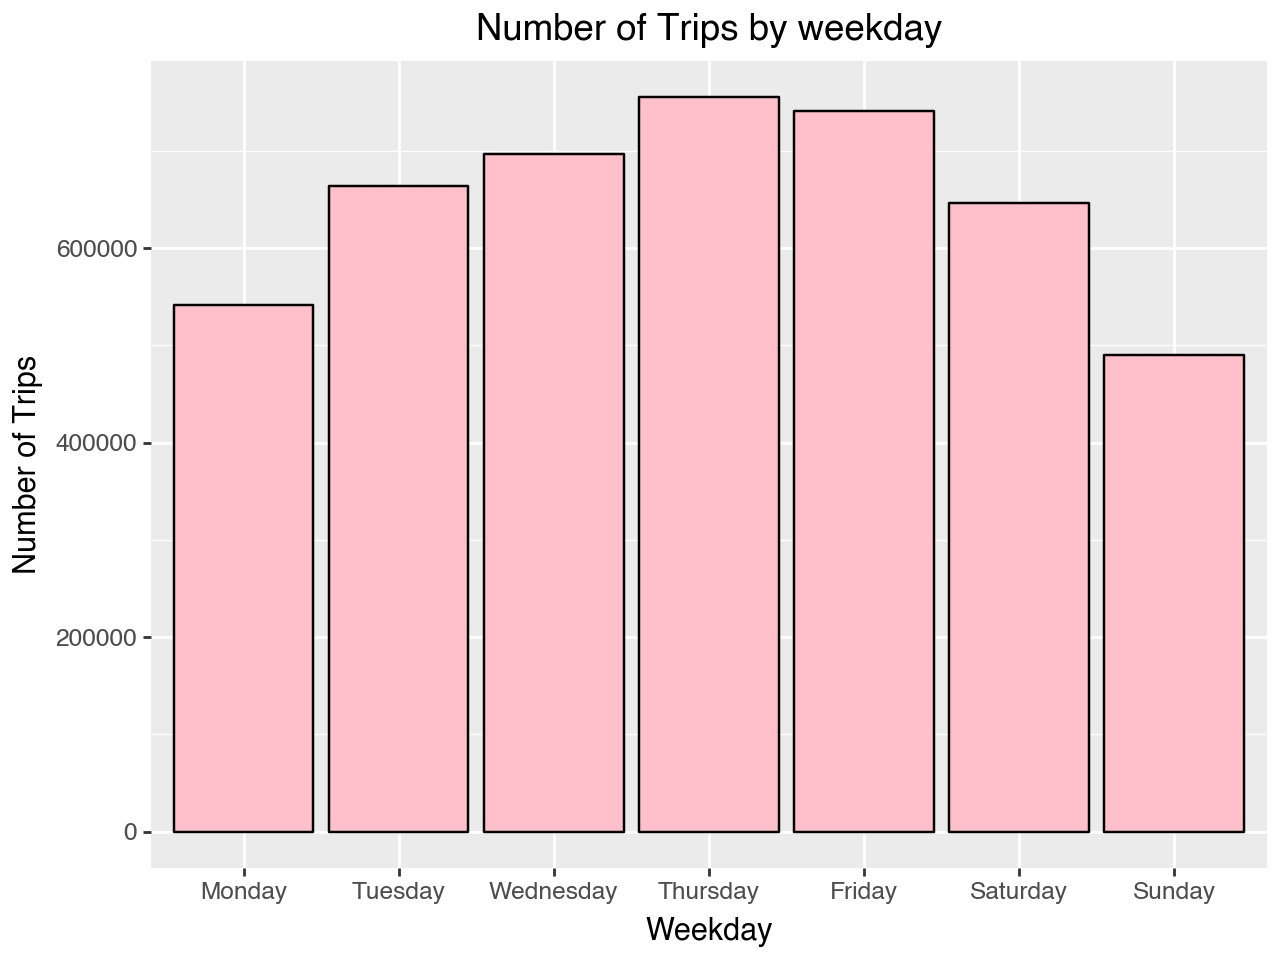

In [20]:
trip_by_weekday = (
    ggplot(df_weekday_reset, aes(x='Weekday', y='Number_of_trips')) 
    + geom_col(fill='pink', color='black', alpha=1) 
    + labs(title='Number of Trips by weekday', x='Weekday', y='Number of Trips') 
)
trip_by_weekday.show()

In [21]:
max_trips_weekday = max(df_weekday['Number_of_trips'])
max_weekday = df_weekday['Number_of_trips'].idxmax()
print('The highest number of trips by weekday are {}, that corresponds to {}'.format(max_trips_weekday, max_weekday))

The highest number of trips by weekday are 755145, that corresponds to Thursday


In [22]:
mean_number_of_trips_weekend = ((df_weekday.loc['Saturday'] + df_weekday.loc['Sunday']) / 2).values

mean_number_of_trips_workday = (((df_weekday.loc['Monday'] + df_weekday.loc['Tuesday'] + df_weekday.loc['Wednesday'] + df_weekday.loc['Thursday'] + df_weekday.loc['Friday'])/ 5).values)[0]

ratio_weekday = (((mean_number_of_trips_workday - mean_number_of_trips_weekend) / mean_number_of_trips_weekend) * 100)[0]
ratio_weekday = round(ratio_weekday, 1)

print('The mean number of trips during working days is {}% higher than the mean number of trips during weekends.'.format(ratio_weekday))

The mean number of trips during working days is 19.6% higher than the mean number of trips during weekends.


In [23]:
ratio_monday = round((df_weekday.loc['Monday']).values[0] / mean_number_of_trips_workday, 1) * 100
print('The mean number of trips on Monday is {}% of the mean number of trips during work days.'.format(ratio_monday))

The mean number of trips on Monday is 80.0% of the mean number of trips during work days.


In [24]:
difference_sunday_monday = (df_weekday.loc['Monday'] - df_weekday.loc['Sunday']).values[0]
difference_sunday_monday

np.int64(51292)

In [25]:
ratio_sunday_monday = round((df_weekday.loc['Sunday']).values[0] / (df_weekday.loc['Monday']).values[0], 1) * 100
print('The number of trips on Sunday is {}% of monday.'.format(ratio_sunday_monday))

The number of trips on Sunday is 90.0% of monday.


<span style="font-size:16px"> __Conclusion__: The data reveals that __Thursday__ has the __highest number of weekly trips__. On average, workdays (Monday–Friday) see __19.6%__ more trips than weekends (Saturday–Sunday). Interestingly, while __Monday__ has the __fewest__ trips among __workdays__, __20%__ below the average of workdays, it still surpasses the lowest-volume day __(Sunday)__ by __10%__. We need to investigate more to find out why the number of trips on mondays is as low.</span>

## <span style="font-size:20px">1.4. Analyzing by Day</span> 

In [26]:
df_day_grouped = df.groupby(['Day']).count()
df_day_grouped.head()

,Date_Time,Lat,Lon,Base,Month,Weekday,Hour,Minute
Day,,,,,,,,
1,127430,127430,127430,127430,127430,127430,127430,127430
2,143201,143201,143201,143201,143201,143201,143201,143201
3,142983,142983,142983,142983,142983,142983,142983,142983
4,140923,140923,140923,140923,140923,140923,140923,140923
5,147054,147054,147054,147054,147054,147054,147054,147054


In [27]:
df_day = pd.DataFrame({'Number_of_trips':df_day_grouped.values[:,0]}, index = df_day_grouped.index) 
df_day.head()

,Number_of_trips
Day,
1,127430
2,143201
3,142983
4,140923
5,147054


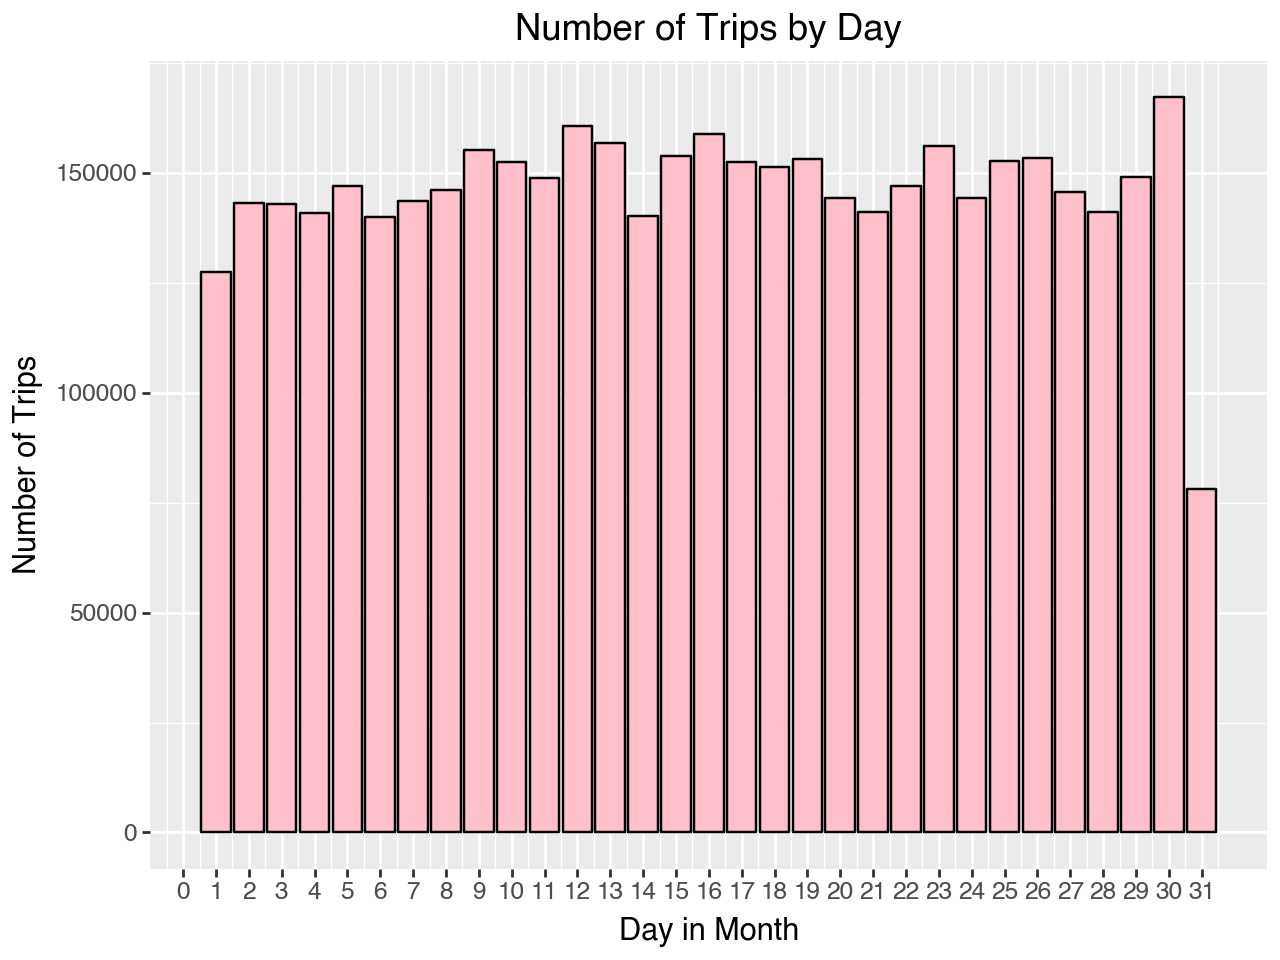

In [28]:
df_day_reset = df_day.reset_index()  
trip_by_day = (
    ggplot(df_day_reset, aes(x='Day', y='Number_of_trips')) 
    + geom_col(fill='pink', color='black', alpha=1) 
    + labs(title='Number of Trips by Day', x='Day in Month', y='Number of Trips') 
    + scale_x_continuous(breaks=range(0, 32))  
)
trip_by_day.show()

<span style="font-size:16px"> __Conclusion__: The day with the highest number of trips is the __30th__, while the 31st shows significantly fewer trips - this is expected since April, June, September, and November only have 30 days. Overall, trip volumes remain relatively consistent across most days of the month, with minimal variation between days 1 through 29.</span>

## <span style="font-size:20px">1.5. Analyzing by Hour and Month</span> 

In [29]:
df_hour_month_grouped = df.groupby(['Hour','Month']).count()
df_hour_month_grouped

Date_Time    Lat    Lon   Base  Weekday    Day  Minute
Hour Month                                                            
0    April          11910  11910  11910  11910    11910  11910   11910
     August         21451  21451  21451  21451    21451  21451   21451
     July           17953  17953  17953  17953    17953  17953   17953
     June           14514  14514  14514  14514    14514  14514   14514
     May            13875  13875  13875  13875    13875  13875   13875
...                   ...    ...    ...    ...      ...    ...     ...
23   August         33609  33609  33609  33609    33609  33609   33609
     July           29346  29346  29346  29346    29346  29346   29346
     June           24182  24182  24182  24182    24182  24182   24182
     May            24836  24836  24836  24836    24836  24836   24836
     September      36568  36568  36568  36568    36568  36568   36568

[144 rows x 7 columns]

In [30]:
df_hour_month = pd.DataFrame({'Number_of_trips':df_hour_month_grouped.values[:,0]}, index = df_hour_month_grouped.index) 
df_hour_month.head(10)

Number_of_trips
Hour Month                     
0    April                11910
     August               21451
     July                 17953
     June                 14514
     May                  13875
     September            24133
1    April                 7769
     August               14471
     July                 11527
     June                  9167

In [31]:
df_hour_month.reset_index(inplace= True)
df_hour_month.head()

,Hour,Month,Number_of_trips
0,0,April,11910
1,0,August,21451
2,0,July,17953
3,0,June,14514
4,0,May,13875


In [32]:
data_hour_month = df_hour_month['Number_of_trips'].values.reshape(24,6)
data_hour_month

array([[11910, 21451, 17953, 14514, 13875, 24133],
       [ 7769, 14471, 11527,  9167,  8186, 16107],
       [ 4935, 10105,  8562,  6189,  5372, 10702],
       [ 5040, 10376,  9199,  6937,  5946, 10789],
       [ 6095, 11774, 10040,  7701,  6945, 12675],
       [ 9476, 16525, 14932, 11955, 10789, 20262],
       [18498, 24907, 23456, 22030, 21015, 33307],
       [24924, 34064, 32545, 30834, 27413, 43314],
       [22843, 34566, 33387, 29771, 25460, 44477],
       [17939, 30195, 28486, 24298, 20507, 38542],
       [17865, 30706, 28558, 23584, 20801, 37634],
       [18774, 31778, 30120, 24155, 22055, 38821],
       [19425, 32106, 30900, 25233, 23595, 39193],
       [22603, 35764, 35832, 28937, 27699, 45042],
       [27190, 40644, 41357, 34428, 34363, 52643],
       [35324, 48197, 46053, 41586, 43087, 61219],
       [42003, 53481, 52403, 48162, 49127, 68224],
       [45475, 57122, 58260, 50452, 51508, 73373],
       [43003, 55390, 57268, 45013, 48965, 75040],
       [38923, 53008, 52332, 38

In [33]:
df_hour_month = pd.DataFrame(data = data_hour_month, index = df_hour_month['Hour'].unique(), 
                             columns = df_hour_month['Month'].unique())
df_hour_month.head()

,April,August,July,June,May,September
0,11910,21451,17953,14514,13875,24133
1,7769,14471,11527,9167,8186,16107
2,4935,10105,8562,6189,5372,10702
3,5040,10376,9199,6937,5946,10789
4,6095,11774,10040,7701,6945,12675


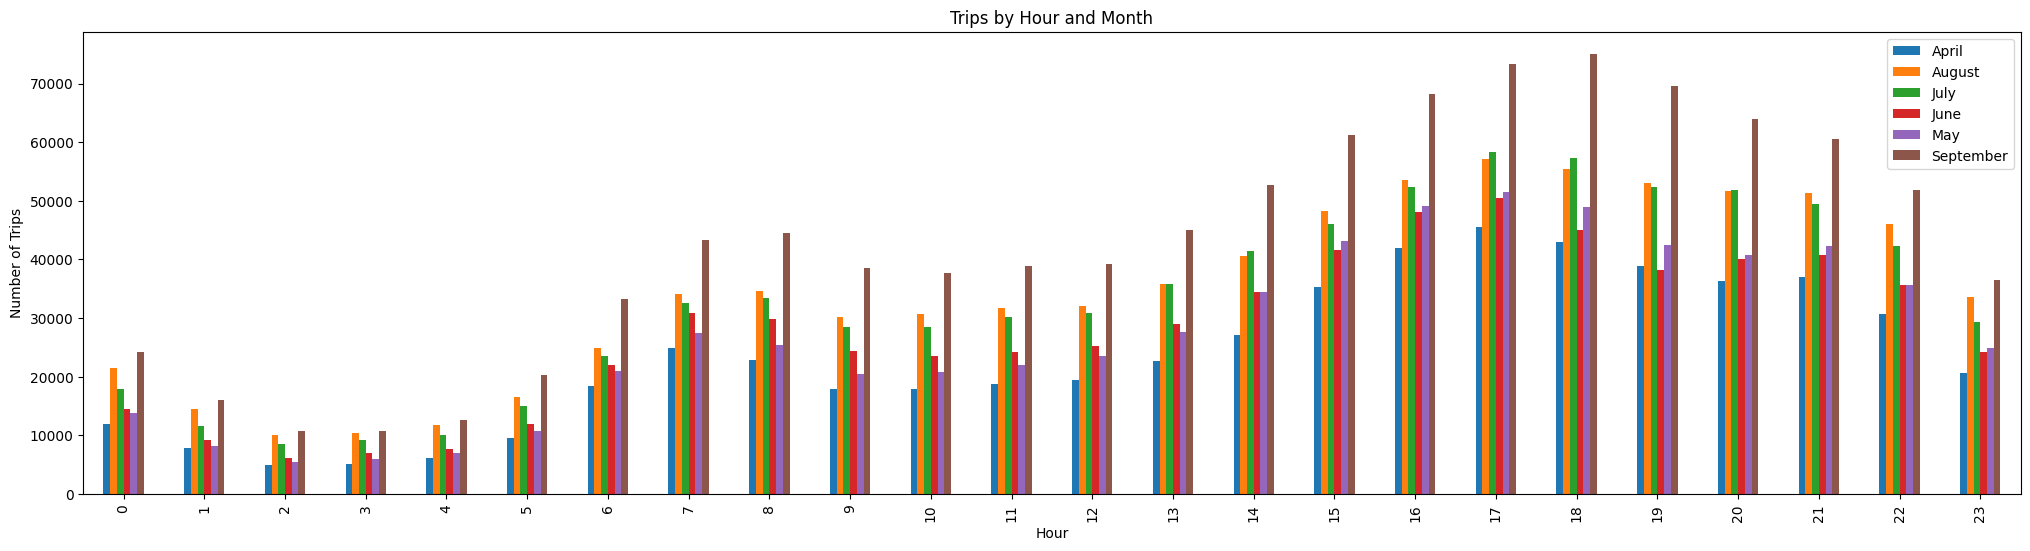

In [34]:
df_hour_month.plot(kind='bar', figsize=(25, 6))
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')
plt.show()

<span style="font-size:16px"> __Conclusion__: All months follow roughly the same pattern, with __three distinct peaks__: one from __23:00 to 00:00__, another from __7:00 to 8:00__, and a third between __17:00 and 19:00__.</span>

## <span style="font-size:20px">1.6. Analyzing by Weekday and Hour</span> 

In [35]:
df_weekday_hour_grouped = df.groupby(['Weekday','Hour']).count()
df_weekday_hour_grouped

Date_Time    Lat    Lon   Base  Month    Day  Minute
Weekday   Hour                                                      
Friday    0         13716  13716  13716  13716  13716  13716   13716
          1          8163   8163   8163   8163   8163   8163    8163
          2          5350   5350   5350   5350   5350   5350    5350
          3          6930   6930   6930   6930   6930   6930    6930
          4          8806   8806   8806   8806   8806   8806    8806
...                   ...    ...    ...    ...    ...    ...     ...
Wednesday 19        47017  47017  47017  47017  47017  47017   47017
          20        47772  47772  47772  47772  47772  47772   47772
          21        44553  44553  44553  44553  44553  44553   44553
          22        32868  32868  32868  32868  32868  32868   32868
          23        18146  18146  18146  18146  18146  18146   18146

[168 rows x 7 columns]

In [36]:
df_weekday_hour = pd.DataFrame({'Number_of_trips':df_weekday_hour_grouped.values[:,1]}, index = df_weekday_hour_grouped.index) 
df_weekday_hour

Number_of_trips
Weekday   Hour                 
Friday    0               13716
          1                8163
          2                5350
          3                6930
          4                8806
...                         ...
Wednesday 19              47017
          20              47772
          21              44553
          22              32868
          23              18146

[168 rows x 1 columns]

In [37]:
df_weekday_hour.reset_index(inplace= True)
data_weekday_hour = df_weekday_hour['Number_of_trips'].values.reshape(7,24)
df_weekday_hour = pd.DataFrame(data = data_weekday_hour, index = df_weekday_hour['Weekday'].unique(), columns = df['Hour'].unique())
df_weekday_hour.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,...,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,...,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764


In [38]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 
               'Thursday', 'Friday', 'Saturday', 'Sunday']

df_weekday_hour.index = pd.CategoricalIndex(
    df_weekday_hour.index,
    categories=weekday_order,
    ordered=True
)
df_weekday_hour = df_weekday_hour.sort_index()
df_weekday_hour

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,...,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,...,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,...,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,...,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166


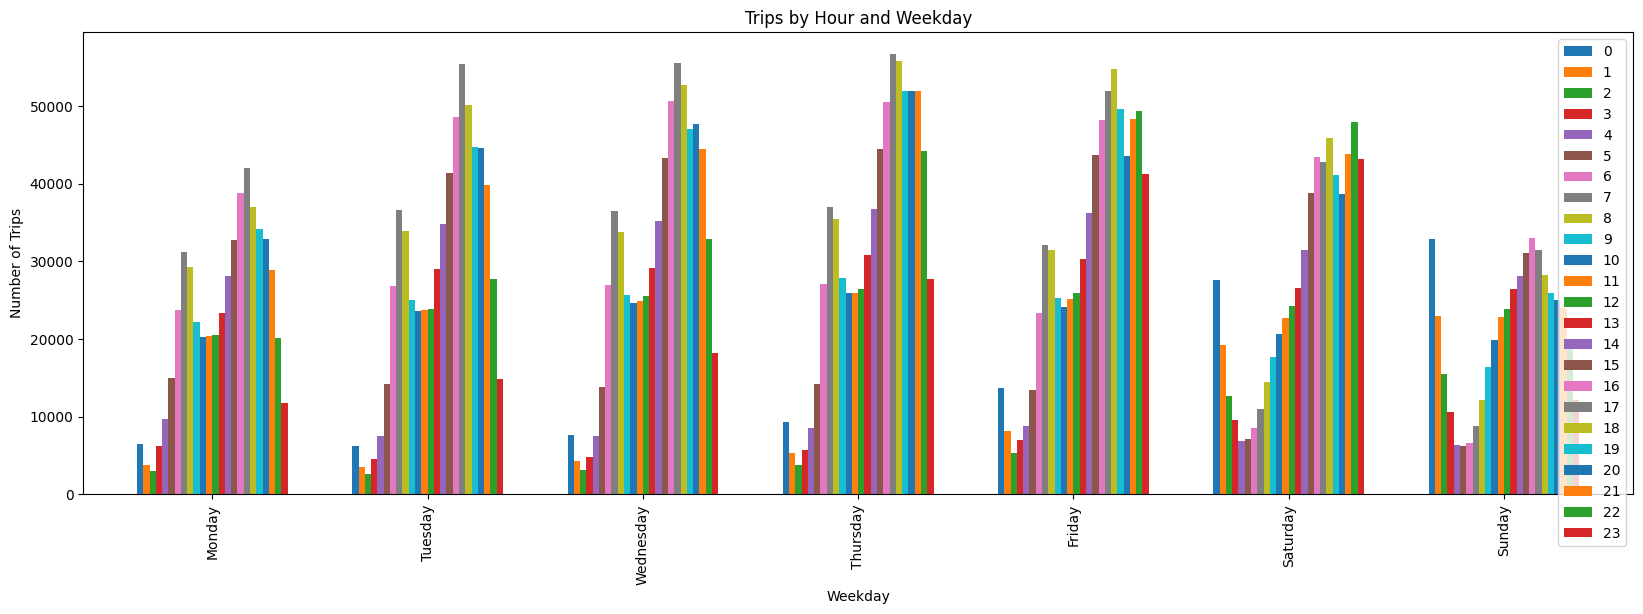

In [39]:
df_weekday_hour.plot(kind='bar', figsize=(20,6), width = 0.7)

plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Weekday')

plt.show()

<span style="font-size:16px"> __Conclusion__: During __working days__ (Monday-Friday), we observe distinct spikes in Uber usage __at 7:00 and 8:00 AM__, corresponding to typical morning commute times when employees __travel to work__. These morning rush hour peaks are notably absent on weekends, when work-related travel is minimal. Conversely, __weekend days__ (Saturday and Sunday) show significantly higher trip volumes __during late-night hours__ (midnight to 2:00 AM).</span>

In [40]:
monday_7_8am = df_weekday_hour.loc['Monday', [7, 8]].sum()
workdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
workdays_7_8am = df_weekday_hour.loc[workdays, [7, 8]].sum(axis=1)
workdays_7_8am = workdays_7_8am.mean()
ratio = round(monday_7_8am / workdays_7_8am, 2) * 100
print('Morning commute times Uber usage on Monday is {}% of the average of all working days.'.format(ratio))

Morning commute times Uber usage on Monday is 90.0% of the average of all working days.


In [41]:
monday_offwork = df_weekday_hour.loc['Monday', [16, 17, 18]].sum()
workdays_offwork = df_weekday_hour.loc[workdays, [16, 17, 18]].sum(axis=1)
workdays_offwork = workdays_offwork.mean()
ratio = round(monday_offwork/ workdays_offwork, 2) * 100
print('Offwork commute times Uber usage on Monday is {}% of the average of all working days.'.format(ratio))

Offwork commute times Uber usage on Monday is 79.0% of the average of all working days.


<span style="font-size:16px"> __Conclusion__: Surprisingly, Uber usage on Monday mornings (7–8 AM) is 90% of the average usage across all workdays. However, the evening return trip (4–6 PM) shows only 79% of the average workday Uber usage. We don't know what is the reason, why people chose a different way going back home from work.</span>

## <span style="font-size:20px">1.7. Analyzing by Day and Month with Heatmap</span> 

In [42]:
def count_rows(rows):
    return len(rows)
df_Day_Month = df.groupby(['Day','Month']).apply(count_rows).unstack()
df_Day_Month.head()

/var/folders/94/3dbdl7r55z945lp2dktwjl7h0000gn/T/ipykernel_1983/2286766921.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


Month,April,August,July,June,May,September
Day,,,,,,
1,14546.0,32353.0,21228.0,15967.0,23375.0,19961.0
2,17474.0,28678.0,26480.0,17503.0,24235.0,28831.0
3,20701.0,23146.0,21597.0,22674.0,22234.0,32631.0
4,26714.0,24952.0,14148.0,22831.0,13918.0,38360.0
5,19521.0,28094.0,10890.0,28371.0,17859.0,42319.0


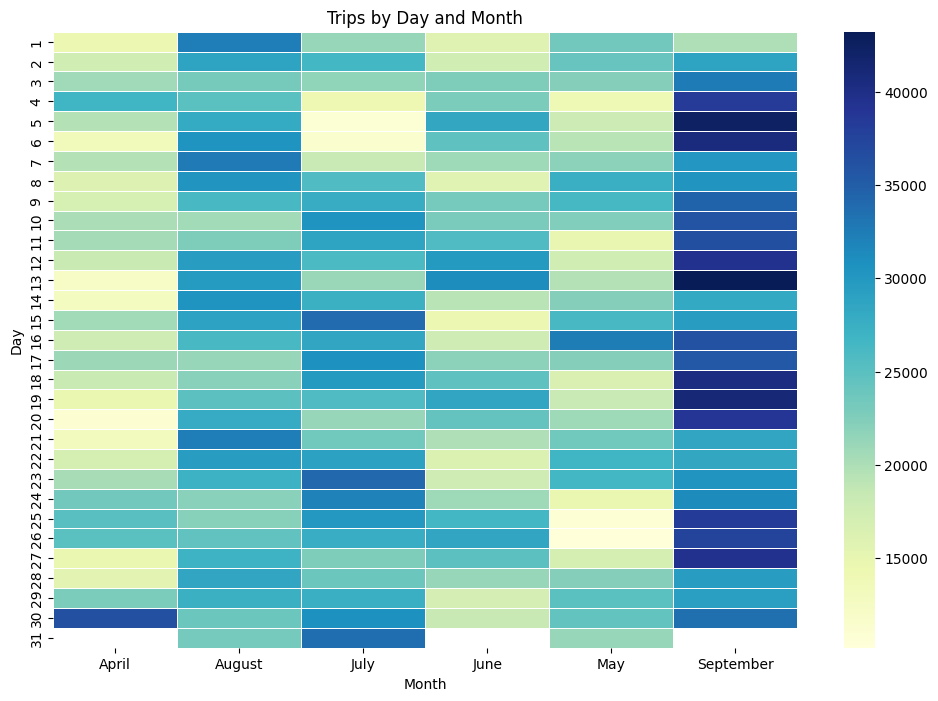

In [43]:
plt.figure(figsize = (12,8))
ax = sns.heatmap(df_Day_Month, cmap = 'YlGnBu', linewidth = .5)
ax.set(title="Trips by Day and Month")
plt.show()

<span style="font-size:16px"> __Conclusion__: 30th April has a peak of number of trips, we don't have enough data to know the reason, it might be an outliner.</span>

# <span style="font-size:24px">2. Choropleth map</span> 

In [50]:
df['lat_bin'] = df['Lat'].round(2)
df['lon_bin'] = df['Lon'].round(2)

heat_data = df.groupby(['lat_bin', 'lon_bin']).size().reset_index(name='count')
heat_data = heat_data[['lat_bin', 'lon_bin', 'count']].values.tolist()

m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
HeatMap(heat_data, radius=15).add_to(m)
m

<span style="font-size:16px"> __Conclusion__: We have over 4 million location records. To create the choropleth map efficiently, we first round the coordinates to 2 decimal places and use point counts to represent density accurately (more points = hotter colors).</span>

# <span style="font-size:24px">3. Conclusion</span>

# Rideshare Demand Analysis

## Key Findings

### 📈 Annual Trends
- **Steady demand growth** throughout the year  
- **Peak volume in September** (highest monthly demand)  

### 📅 Day-of-Week Patterns
- **Busiest days**: Thursday & Friday  
  - Likely due to:  
    ✓ Work commutes  
    ✓ Weekend preparation travel  
- **Lowest demand**: Sunday  
- **19.6% more trips** on weekdays (Mon-Fri) vs weekends (Sat-Sun)  

### 🕒 Hourly Trends
| Timeframe       | Demand Level | Likely Reasons          |
|-----------------|--------------|-------------------------|
| 5-7 PM         | Peak         | Evening rush hour       |
| 6-9 AM         | High         | Morning commutes        | 
| Weekends:      |              |                         |
| 12-2 AM        | High         | Late-night activities   |
| Mornings       | Low          | Minimal work commutes   |

### 🔍 Notable Observations
1. **Monday anomalies**:
   - 20% below weekday average
   - Morning (7-8 AM): 90% of avg weekday usage
   - Evening (4-6 PM): Only 79% of avg weekday usage

2. **April spike**:
   - Significant demand increase in late April
   - Potential outlier (requires further investigation)

### 🌎 Geographic Distribution
| Area Type       | Examples                          | Color Coding | Demand Level |
|-----------------|-----------------------------------|--------------|--------------|
| Hotspots        | NY, New Brunswick, Stamford       | Bright red   | Very high    |
| Peripheral zones| Springs, Milford, Peekskill       | Blue/green   | Low          |
| Outliers        | Southbridge (needs verification)  | N/A          | Anomalous    |